In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
df

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0          0.0       0.0           0.0     0.0  ...            1.0   
1          0.0       0.0           1.0     0.0  ...            0.0   
2          0.0       0.0           0.0     1.0  ...            1.0   
3          0.0       0.0           1.0     1.0  ...            1.0   
4          0.0       0.0           1.0     1.0  ...            1.0   
...        ...       ...           ...     ...  ...            ...   
253675     0.0       0.0           0.0     1.0  ...            1.0   
253676     0.0       2.0           0.0     0.0  ...            1.0   
253677     0.0       0.0           1.0     1.0  ...            1.0   
253678     0.0       0.0           0.0     1.0  ...            1.0   
253679     0.0       2.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [3]:
x,y=df[["HighBP","HighChol","CholCheck","BMI","Smoker","Stroke","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Age","Education","Income"]],df["HeartDiseaseorAttack"]

In [4]:
X_train, X_test, y_train, y_test= train_test_split (x, y, test_size=0.3, random_state=42)

In [5]:
print('len(X_TRAIN:)',len(X_train))
print('len(X_TEST:)',len(X_test))

len(X_TRAIN:) 177576
len(X_TEST:) 76104


In [15]:
svm = SVC(C=1.0, kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [16]:

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.7575334821428571
Recall: 0.8185859147103764
Precision: 0.7308694034478482
F1_score: 0.7722447909841437


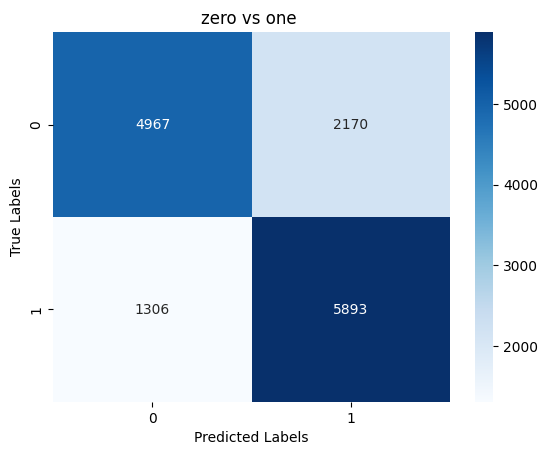

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("zero vs one ")

# Show the plot
plt.show()

In [18]:
# calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# print the AUC score
print("AUC score: {:.2f}".format(auc_score))

AUC score: 0.76


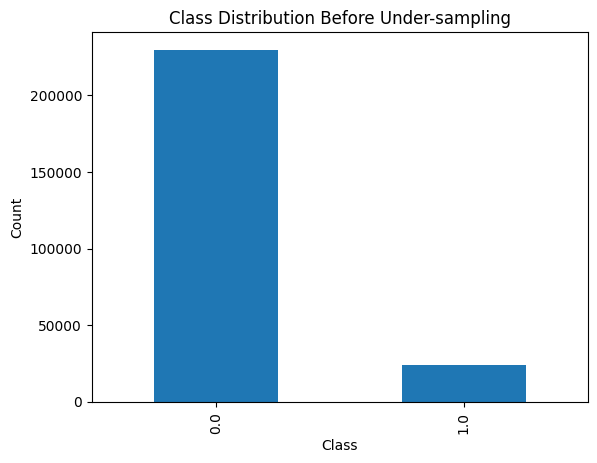

In [19]:
class_counts_before = y.value_counts()
class_counts_before.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Under-sampling')
plt.show()

In [20]:
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [21]:
print('len(X_TRAIN:)',len(X_train))
print('len(X_TEST:)',len(X_test))

len(X_TRAIN:) 33450
len(X_TEST:) 14336


In [22]:
svm = SVC(C=1.0, kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
f1 = f1_score(y_test,y_pred)
print('F1_score:', f1)

Accuracy: 0.7575334821428571
Recall: 0.8185859147103764
Precision: 0.7308694034478482
F1_score: 0.7722447909841437


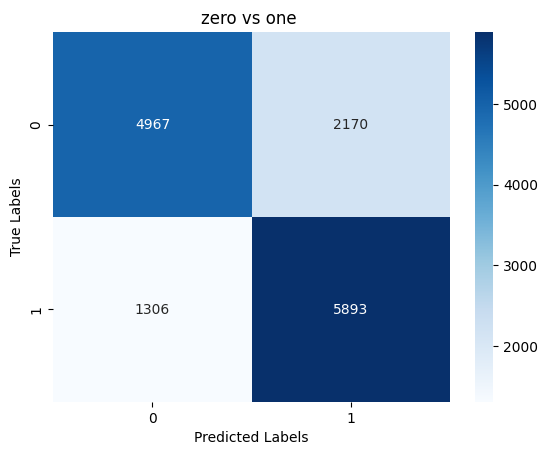

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("zero vs one ")

# Show the plot
plt.show()

In [25]:
# calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# print the AUC score
print("AUC score: {:.2f}".format(auc_score))

AUC score: 0.76


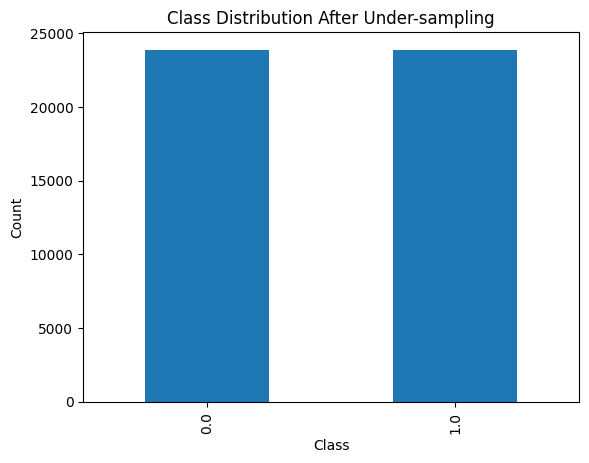

In [26]:
class_counts_after = pd.Series(y_resampled).value_counts()
class_counts_after.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Under-sampling')
plt.show()